In [1]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

In [2]:
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
data = pd.read_csv("diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Underweight:0 diabetes cases out of 4 total recorded data
Normal:7 diabetes cases out of 108 total recorded data
Overweight:44 diabetes cases out of 180 total recorded data
Obese Class I:100 diabetes cases out of 221 total recorded data
Obese Class II:61 diabetes cases out of 148 total recorded data
Obese Class III:54 diabetes cases out of 96 total recorded data


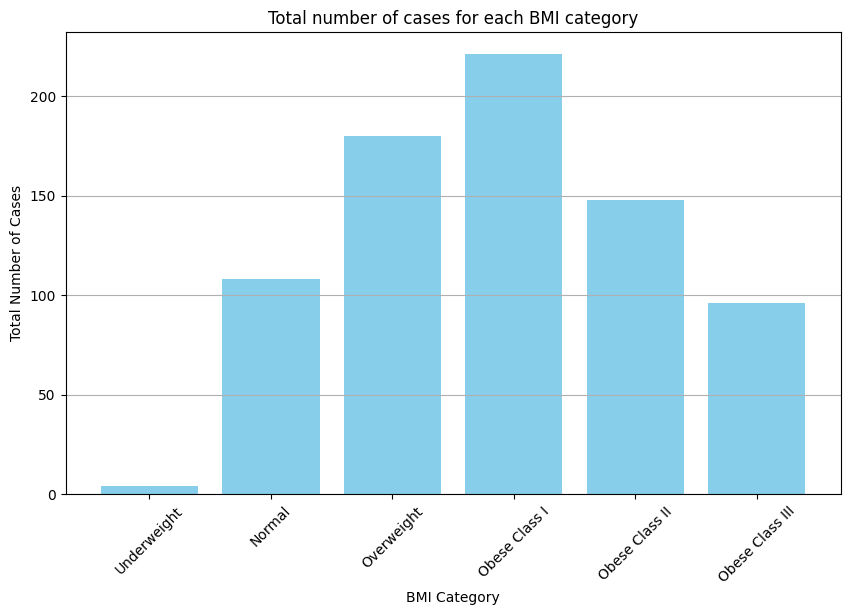

In [5]:
bmi_bins = [0,18.5,25,30,35,40,100]
bmi_labels = ["Underweight","Normal","Overweight","Obese Class I","Obese Class II","Obese Class III"]
data["BMI_Category"] = pd.cut(data["BMI"], bins=bmi_bins, labels=bmi_labels)
bmi_diabetes_cases = {}
bmi_total_cases = {}
for label in bmi_labels:
  subset_df = data[data["BMI_Category"]== label]
  bmi_diabetes_cases[label] = len(subset_df[subset_df["Outcome"]== 1])
  bmi_total_cases[label] = len(subset_df)
for label in bmi_labels:
  print("{}:{} diabetes cases out of {} total recorded data".format(label, bmi_diabetes_cases[label], bmi_total_cases[label]))
plt.figure(figsize=(10,6))
plt.bar(bmi_diabetes_cases.keys(),bmi_total_cases.values(),color='skyblue')
plt.title("Total number of cases for each BMI category")
plt.xlabel("BMI Category")
plt.ylabel("Total Number of Cases")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()